# Rain prediction

### <strong>Intitulé :</strong> Le dataset suivant comprend des données issues de plusieurs stations météo.
Voici un rapide descriptif des colonnes: 
* date: date d'enregistrement 
* numer_sta: numéro unique de la station 
* Latitude: Latitude
* Longitude: Longitude
* Altitude: Altitude
* pmer: pression au niveau de la mer (hpa)
* dd: direction du vent a 10m (rose de 360)
* ff: force du vent a 10m (m/s)
* t: tempe sous abri inst. (degre C)
* u: humidité 
* rr3: hauteur de precipitations en 3 heure (mm et 1/10)
* pres: pression à l'altitude de la station (hpa)
* dd_sin: composante sin de direction du vent
* dd_cos: composante cos de direction du vent

### <strong>Objectif:</strong> 
Prédire si un évènement pluvieux a lieu en fonction d'autres grandeurs présententes dans le dataset. 
On considère un événement pluvieux à partir du moment ou rr3 > 0 (Evidemment, la colonne rr3 ne pourra donc pas faire partie des features puisse que la target ne découle directement).

In [95]:
import pandas as pd
import numpy as np

# 1- Load the dataset

In [96]:
df = pd.read_csv('data_weather.csv')

# 2 - Cleaning the data

Let's see the shape of the dataset

In [97]:
df.shape

(505857, 15)

We have about 500000 rows and 15 columns.
Let's check the first few rows of the data.

In [98]:
df.head(5)

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
0,2010-01-01 00:00:00,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,0.0,0,98410.0,-0.766044,-0.642788
1,2010-01-01 03:00:00,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,0.0,0,98520.0,-0.939693,-0.342020
2,2010-01-01 06:00:00,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,0.0,0,98920.0,-0.939693,0.342020
3,2010-01-01 09:00:00,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,0.0,0,99340.0,-0.766044,0.642788
4,2010-01-01 12:00:00,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,0.0,0,99690.0,-0.766044,0.642788


We have a quick look at the dataset using the .describe() method

In [99]:
df.describe()

,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
count,505857.000000,505857.000000,505857.000000,505857.000000,5.058570e+05,505857.000000,505857.000000,505857.000000,505857.000000,505857.000000,505857.000000,505791.000000,5.058570e+05,505857.000000
mean,7464.116831,45.478172,3.451461,193.196708,inf,185.492402,3.417473,13.266307,71.291632,0.000035,0.018035,99359.894818,-7.266871e-02,0.096686
std,161.478737,1.502581,2.724426,217.479032,NaN,112.882202,2.350552,7.781763,18.898504,0.003194,0.133077,2597.553814,6.482709e-01,0.751743
min,7222.000000,43.437667,-1.608833,2.000000,1.059852e-205,0.000000,0.000000,-19.700000,1.000000,0.000000,0.000000,88160.000000,-1.000000e+00,-1.000000
25%,7280.000000,43.648833,1.175000,26.000000,1.012600e+05,80.000000,1.600000,7.700000,58.000000,0.000000,0.000000,98430.000000,-6.427876e-01,-0.642788
50%,7481.000000,45.726500,3.963167,151.000000,1.017500e+05,190.000000,3.000000,13.000000,74.000000,0.000000,0.000000,99960.000000,-2.449294e-16,0.173648
75%,7630.000000,47.150000,5.216000,263.000000,1.022900e+05,280.000000,4.600000,18.700000,87.000000,0.000000,0.000000,101120.000000,5.000000e-01,0.866025
max,7690.000000,47.614333,7.510000,871.000000,inf,360.000000,23.500000,42.000000,100.000000,0.990000,1.000000,104170.000000,1.000000e+00,1.000000


We can already see some columns have issue >>> pmer 

Let's check if we have null values in the dataset.


In [100]:
print(df.isnull().sum())

date          0
numer_sta     0
Latitude      0
Longitude     0
Altitude      0
pmer          0
dd            0
ff            0
t             0
u             0
ssfrai        0
rr3           0
pres         66
dd_sin        0
dd_cos        0
dtype: int64


We only have 66 rows with null values in the pres column, let's get rid of it

In [101]:
df.dropna(inplace=True)

We have to deal with null values in "pres"

Let's check the type of columns

In [102]:
# check the type of the columns
df.dtypes

date          object
numer_sta    float64
Latitude     float64
Longitude    float64
Altitude     float64
pmer         float64
dd           float64
ff           float64
t            float64
u            float64
ssfrai       float64
rr3            int64
pres         float64
dd_sin       float64
dd_cos       float64
dtype: object

Everything looks fine but for the date, not in datetime format

In [103]:
# we can see that the column 'date' is not in the right format
# we will convert it to datetime
df['date'] = pd.to_datetime(df['date'])

In [104]:
# check the type of the columns
df.dtypes

date         datetime64[ns]
numer_sta           float64
Latitude            float64
Longitude           float64
Altitude            float64
pmer                float64
dd                  float64
ff                  float64
t                   float64
u                   float64
ssfrai              float64
rr3                   int64
pres                float64
dd_sin              float64
dd_cos              float64
dtype: object

In [105]:
df.head()

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
0,2010-01-01 00:00:00,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,0.0,0,98410.0,-0.766044,-0.642788
1,2010-01-01 03:00:00,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,0.0,0,98520.0,-0.939693,-0.342020
2,2010-01-01 06:00:00,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,0.0,0,98920.0,-0.939693,0.342020
3,2010-01-01 09:00:00,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,0.0,0,99340.0,-0.766044,0.642788
4,2010-01-01 12:00:00,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,0.0,0,99690.0,-0.766044,0.642788


let's check for duplicates

In [106]:
# check for duplicates
df.duplicated().sum()

66

We only have 66 duplicates, let's get rid of them

In [107]:
#remove duplicates
df = df.drop_duplicates()

We replace inf value by max value in the "pmer" column

In [108]:
pmer_max = df['pmer'][~np.isinf(df['pmer'])].max()
df['pmer'] = df['pmer'].apply(lambda x: pmer_max if np.isinf(x) else x)

In [109]:
df.describe()

,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos
count,505725.000000,505725.000000,505725.000000,505725.000000,5.057250e+05,505725.000000,505725.00000,505725.000000,505725.000000,505725.000000,505725.000000,505725.000000,5.057250e+05,505725.000000
mean,7464.122169,45.478113,3.451389,193.195893,7.556774e+94,185.488002,3.41752,13.266828,71.292617,0.000035,0.018030,99359.873943,-7.264192e-02,0.096604
std,161.479884,1.502585,2.724525,217.489489,3.384631e+96,112.876648,2.35045,7.781668,18.898608,0.003195,0.133058,2597.502490,6.482872e-01,0.751742
min,7222.000000,43.437667,-1.608833,2.000000,1.059852e-205,0.000000,0.00000,-19.700000,1.000000,0.000000,0.000000,88160.000000,-1.000000e+00,-1.000000
25%,7280.000000,43.648833,1.175000,26.000000,1.012600e+05,80.000000,1.60000,7.700000,58.000000,0.000000,0.000000,98430.000000,-6.427876e-01,-0.642788
50%,7481.000000,45.726500,3.963167,151.000000,1.017500e+05,190.000000,3.00000,13.000000,74.000000,0.000000,0.000000,99960.000000,-2.449294e-16,0.173648
75%,7630.000000,47.150000,5.216000,263.000000,1.022900e+05,280.000000,4.60000,18.700000,87.000000,0.000000,0.000000,101120.000000,5.000000e-01,0.866025
max,7690.000000,47.614333,7.510000,871.000000,1.529591e+98,360.000000,23.50000,42.000000,100.000000,0.990000,1.000000,104170.000000,1.000000e+00,1.000000


Let's have a quick look at the distribution of the data using the .hist() method

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'numer_sta'}>,
        <AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Altitude'}>,
        <AxesSubplot:title={'center':'pmer'}>,
        <AxesSubplot:title={'center':'dd'}>,
        <AxesSubplot:title={'center':'ff'}>],
       [<AxesSubplot:title={'center':'t'}>,
        <AxesSubplot:title={'center':'u'}>,
        <AxesSubplot:title={'center':'ssfrai'}>,
        <AxesSubplot:title={'center':'rr3'}>],
       [<AxesSubplot:title={'center':'pres'}>,
        <AxesSubplot:title={'center':'dd_sin'}>,
        <AxesSubplot:title={'center':'dd_cos'}>, <AxesSubplot:>]],
      dtype=object)

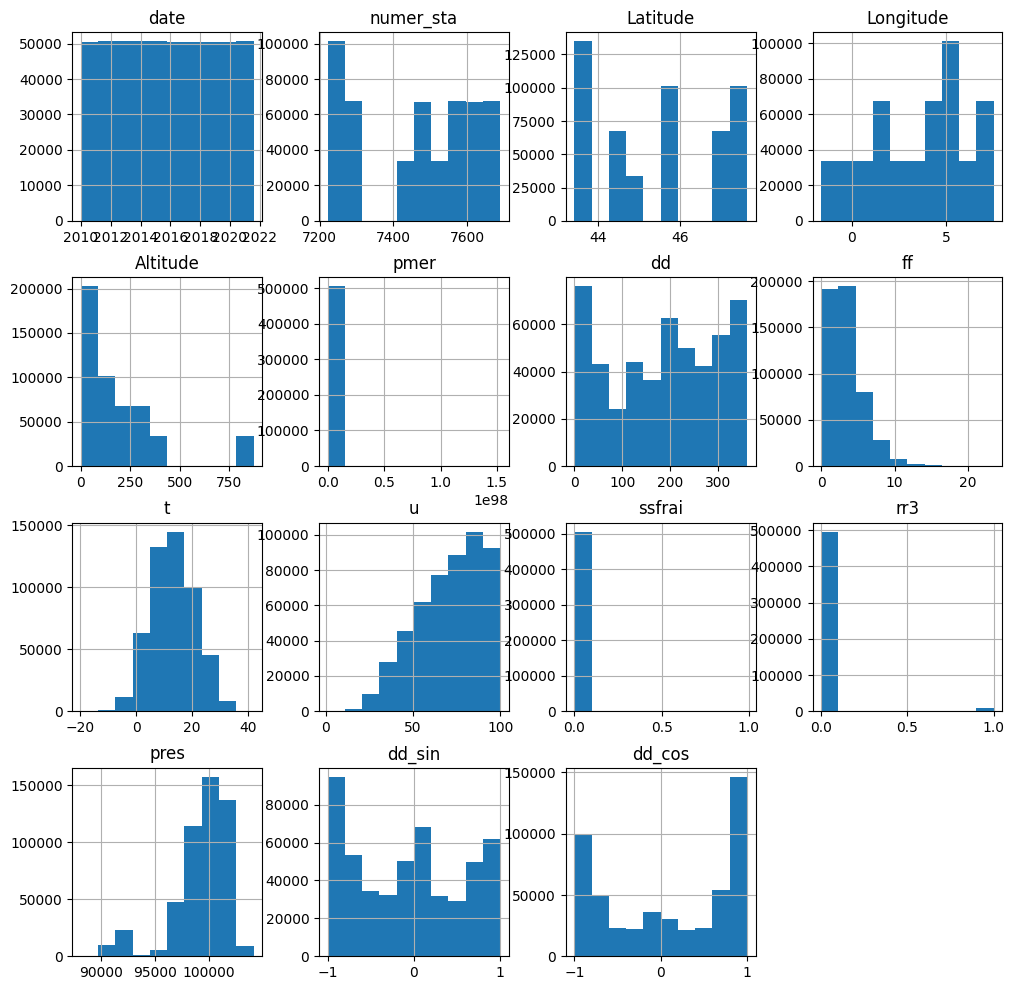

In [110]:
df.hist(figsize=(12, 12))

# 3 - Feature's engineering and selection

We need to convert features that have a cyclic nature to metrics that can be used in the model. 
For example, the day of the year is a cyclic feature that can be converted to sin and cos features.

First we extract the date and hours from the datetime in two columns

In [111]:
### We extract the date and hours from the datetime in two columns
df['time'] = df['date'].dt.time
df['date_only'] = df['date'].dt.date
# From the date we can extract convert the month and day to the days number in the year
df['day'] = df['date'].apply(lambda x: x.timetuple().tm_yday)
# From the time we can extract the hour
df['hour'] = df['time'].apply(lambda x: x.hour)

We convert day to sin and cos to keep the cyclical nature of the data

In [112]:
# We convert day to sin and cos to keep the cyclical nature of the data
df['day_sin'] = np.sin(df['day'] * (2 * np.pi / 365))
df['day_cos'] = np.cos(df['day'] * (2 * np.pi / 365))

We convert hour to sin and cos to keep the cyclical nature of the data

In [113]:
 # We convert hour to sin and cos to keep the cyclical nature of the data
df['hour_sin'] = np.sin(df['hour'] * (2 * np.pi / 24))
df['hour_cos'] = np.cos(df['hour'] * (2 * np.pi / 24))

Let's check the columns name

In [114]:
df.columns

Index(['date', 'numer_sta', 'Latitude', 'Longitude', 'Altitude', 'pmer', 'dd',
       'ff', 't', 'u', 'ssfrai', 'rr3', 'pres', 'dd_sin', 'dd_cos', 'time',
       'date_only', 'day', 'hour', 'day_sin', 'day_cos', 'hour_sin',
       'hour_cos'],
      dtype='object')

In [115]:
df.head()

,date,numer_sta,Latitude,Longitude,Altitude,pmer,dd,ff,t,u,...,dd_sin,dd_cos,time,date_only,day,hour,day_sin,day_cos,hour_sin,hour_cos
0,2010-01-01 00:00:00,7510.0,44.830667,-0.691333,47.0,99050.0,230.0,9.8,9.6,81.0,...,-0.766044,-0.642788,00:00:00,2010-01-01,1,0,0.017213,0.999852,0.000000e+00,1.000000e+00
1,2010-01-01 03:00:00,7510.0,44.830667,-0.691333,47.0,99160.0,250.0,11.8,8.7,87.0,...,-0.939693,-0.342020,03:00:00,2010-01-01,1,3,0.017213,0.999852,7.071068e-01,7.071068e-01
2,2010-01-01 06:00:00,7510.0,44.830667,-0.691333,47.0,99570.0,290.0,5.1,7.6,91.0,...,-0.939693,0.342020,06:00:00,2010-01-01,1,6,0.017213,0.999852,1.000000e+00,6.123234e-17
3,2010-01-01 09:00:00,7510.0,44.830667,-0.691333,47.0,99990.0,310.0,5.7,6.8,92.0,...,-0.766044,0.642788,09:00:00,2010-01-01,1,9,0.017213,0.999852,7.071068e-01,-7.071068e-01
4,2010-01-01 12:00:00,7510.0,44.830667,-0.691333,47.0,100350.0,310.0,6.2,6.6,82.0,...,-0.766044,0.642788,12:00:00,2010-01-01,1,12,0.017213,0.999852,1.224647e-16,-1.000000e+00


We can get rid of the columns we don't need
- "date", 'time', 'date_only', 'day', 'hour' are no longer needed because we extracted the cyclic information as the sin and cos of the days of the year and of the time
- "number_sta" is not required as it is represented by the longitude and latitude of the station
- "dd" is no longer needed because it's cyclic representation is provided by dd_sin and dd_cos

In [116]:
df = df.drop(columns=['date', 'numer_sta', 'time', 'date_only', 'day', 'hour', 'dd'])

In [117]:
df.head()

,Latitude,Longitude,Altitude,pmer,ff,t,u,ssfrai,rr3,pres,dd_sin,dd_cos,day_sin,day_cos,hour_sin,hour_cos
0,44.830667,-0.691333,47.0,99050.0,9.8,9.6,81.0,0.0,0,98410.0,-0.766044,-0.642788,0.017213,0.999852,0.000000e+00,1.000000e+00
1,44.830667,-0.691333,47.0,99160.0,11.8,8.7,87.0,0.0,0,98520.0,-0.939693,-0.342020,0.017213,0.999852,7.071068e-01,7.071068e-01
2,44.830667,-0.691333,47.0,99570.0,5.1,7.6,91.0,0.0,0,98920.0,-0.939693,0.342020,0.017213,0.999852,1.000000e+00,6.123234e-17
3,44.830667,-0.691333,47.0,99990.0,5.7,6.8,92.0,0.0,0,99340.0,-0.766044,0.642788,0.017213,0.999852,7.071068e-01,-7.071068e-01
4,44.830667,-0.691333,47.0,100350.0,6.2,6.6,82.0,0.0,0,99690.0,-0.766044,0.642788,0.017213,0.999852,1.224647e-16,-1.000000e+00


Our dataset is clean and we have features that are interpretable by our model

# 4 - Defining our strategy 

We are facing a binary classification problem, let's have a look at our target

In [140]:
df['rr3'].unique()

array([0, 1])

We have two categories for "rr3":
- 0 = not rain
- 1 = rain

Are the occurence of these two categories balanced?

In [119]:
(df['rr3'] == 0).sum() / df.shape[0]

0.9819704384794108

The dataset is heavily imbalanced, about 2 rain events out of 100 events, ouch!

We make the assumption that cost of False Negative (FN) is more important than the cost of False Positive (FP). In other words, we prefer to be able to catch the most part of the true rain event (low FN), event if it affect the rate of rain event that or not (high FP). 

So, we will have to:
* Use metrics other than accuracy since it is not appropriated for imbalanced in classification problems.
* or use oversampling strategies to balance the classes (i.e. SMOTETomek).
* We will have to fine tune the model in order to reach our assumption (i.e. False Negative have more cost than False Positive)
* We will use an XGBClassifier for it's robusness and efficiency 

# 5 - Training the model

I will use two approaches here:
* Without data augmentation (passing the scale_pos_weight argument to the XGBClassifier to correct the imbalance problem) 
* With data augmentation (i.e. oversampling using SOMETETomek)

In [144]:
# we import sklearn to built the data pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from imblearn.combine import SMOTETomek
from collections import Counter

# we will split the data into train and test
y = df['rr3']
X = df.drop(columns=['rr3'])

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Check the original class distribution
print("Original class distribution:", Counter(y_train))

# Calculate the ratio of negative to positive class, we will need it for the XGBoost parameter scale_pos_weight
radio_neg_to_pos = (y_train == 0).sum() / (y_train == 1).sum()
print(f"ratio of negative to positive class in y_train: {radio_neg_to_pos}")

# Oversample the minority class
smtom = SMOTETomek(random_state=42) # Match the minority class size to the majority class
X_balanced, y_balanced = smtom.fit_resample(X_train, y_train)

print("After oversampling:", Counter(y_balanced))

# We will standardize the data (Optional for XGBoost but needed for PCA, showed here for completeness)
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
    ])

# We will not transform the cyclical features
null_transformer = Pipeline([
    ('no_transform', 'passthrough')
    ])  

# We will transform the target variable to a normal distribution (Optional for XGBoost but needed for other model, showed here for completeness)
pt = PowerTransformer(method='yeo-johnson', standardize=True) # Optional, needed if comparing to other models that require normality (i.e. LDA, Gaussian Naive Bayes)

# We will use the ColumnTransformer to apply the transformations to the correct columns
preprocessor = ColumnTransformer([
    ('num_transformer', num_pipeline, ['Latitude', 'Longitude', 'Altitude', 'ff', 't', 'u', 'ssfrai','pres', 'pmer']),
    ('null_transformer', null_transformer, ['dd_sin', 'dd_cos', 'day_sin', 'day_cos', 'hour_sin','hour_cos']),
    ])

# We will use PCA to reduce the number of features (Optional, if the reduction of the number of features is needed, showed here for completeness)
pca = PCA(n_components=0.95) # Optional, if the reduction of the number of features is needed 

# We create our two pipelines, one with oversampling and one without
pipeline_workflow = make_pipeline(preprocessor, XGBClassifier(eval_metric="logloss", scale_pos_weight=radio_neg_to_pos))
pipeline_workflow_oversampling = make_pipeline(preprocessor, XGBClassifier(eval_metric="logloss"))
set_config(display="diagram")

Original class distribution: Counter({0: 446927, 1: 8225})
ratio of negative to positive class in y_train: 54.33762917933131
After oversampling: Counter({0: 443683, 1: 443683})


In [145]:
#create the diagram of the pipeline without oversampling
pipeline_workflow

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Altitude', 'ff', 't', 'u',
                                                   'ssfrai', 'pres', 'pmer']),
                                                 ('null_transformer',
                                                  Pipeline(steps=[('no_transform',
                                                                   'passthrough')]),
                                                  ['dd_sin', 'dd_cos',
                                                   'day_sin', 'day_cos',
                                                   'hour_sin', 'hour_cos'])])),
                ('xg...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=None, ...))])

In [146]:
#create the diagram of the pipeline with oversampling
pipeline_workflow_oversampling

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Altitude', 'ff', 't', 'u',
                                                   'ssfrai', 'pres', 'pmer']),
                                                 ('null_transformer',
                                                  Pipeline(steps=[('no_transform',
                                                                   'passthrough')]),
                                                  ['dd_sin', 'dd_cos',
                                                   'day_sin', 'day_cos',
                                                   'hour_sin', 'hour_cos'])])),
                ('xg...
                               gamma=None, gpu_id=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=None,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               n_estimators=100, n_jobs=None,
                               num_parallel_tree=None, predictor=None,
                               random_state=None, reg_alpha=None,
                               reg_lambda=None, ...))])

Now we can train our two models with respect to the pipelines

In [147]:
pipeline_workflow.fit(X_train, y_train)
pipeline_workflow_oversampling.fit(X_balanced, y_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Latitude', 'Longitude',
                                                   'Altitude', 'ff', 't', 'u',
                                                   'ssfrai', 'pres', 'pmer']),
                                                 ('null_transformer',
                                                  Pipeline(steps=[('no_transform',
                                                                   'passthrough')]),
                                                  ['dd_sin', 'dd_cos',
                                                   'day_sin', 'day_cos',
                                                   'hour_sin', 'hour_cos'])])),
                ('xg...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

Let's check the scores of our model

In [161]:
print("--------------------------------------")
print("Accuracy of the pipeline_workflow:")
print(f"Train dataset: {pipeline_workflow.score(X_train, y_train)}")
print(f"Test dataset: {pipeline_workflow.score(X_test, y_test)}")
print("--------------------------------------")
print("Accuracy of the pipeline_workflow_oversampling:")
print(f"Train dataset: {pipeline_workflow_oversampling.score(X_train, y_train)}")
print(f"Test dataset: {pipeline_workflow_oversampling.score(X_test, y_test)}")
print("--------------------------------------")

--------------------------------------
Accuracy of the pipeline_workflow:
Train dataset: 0.9783522867086161
Test dataset: 0.9788029185533783
--------------------------------------
Accuracy of the pipeline_workflow_oversampling:
Train dataset: 0.9836604035574928
Test dataset: 0.9827971447214917
--------------------------------------


Whaou about 0.98! Impressive!!! Not really this is the accuracy and the dataset is really imbalanced.

Let's check the precision, recall and f1_score

In [149]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pipeline_workflow.predict(X_test))
report_oversampling = classification_report(y_test, pipeline_workflow_oversampling.predict(X_test))
print("Classification report of the pipeline_workflow_logloss:")
print(report)
print("--------------------------------------")
print("Classification report of the pipeline_workflow_oversampling:")
print(report_oversampling)
print("--------------------------------------")    

Classification report of the pipeline_workflow_logloss:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     49680
           1       0.36      0.25      0.30       893

    accuracy                           0.98     50573
   macro avg       0.67      0.62      0.64     50573
weighted avg       0.98      0.98      0.98     50573

--------------------------------------
Classification report of the pipeline_workflow_oversampling:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     49680
           1       0.56      0.12      0.20       893

    accuracy                           0.98     50573
   macro avg       0.77      0.56      0.59     50573
weighted avg       0.98      0.98      0.98     50573

--------------------------------------


The precision, recall and f1-score are not that good compare to the accuracy.
* Moreover the f1_score (harmonic mean of precision and recall) is better without oversampling than with oversampling.
* The recall is also better without oversampling than with oversampling, and we want a better recall based on our assumption ((i.e. False Negative should have more cost than False Positive))
* Should we take the model without oversampling based on that?
* Let's check the ROC (Receiver Operating Characteristic) curve and fine-tune our models 

# 5 - Fine-tuning the model

In [151]:
from sklearn.metrics import roc_curve, roc_auc_score

# Step 1: Predict on the test set, we want the probabilities, not the predicted classes
y_prob = pipeline_workflow.predict_proba(X_test)[:, 1]
y_prob_oversampling = pipeline_workflow_oversampling.predict_proba(X_test)[:, 1]

# Step 1: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
fpr_os, tpr_os, thresholds_os = roc_curve(y_test, y_prob_oversampling)

# Step 2: Calculate AUC (Area Under Curve) score
auc_score = roc_auc_score(y_test, y_prob)
auc_score_os = roc_auc_score(y_test, y_prob_oversampling)
print(f"AUC Score WITHOUT oversampling: {auc_score:.5f}")
print(f"AUC Score WITH oversampling: {auc_score:.5f}")

AUC Score WITHOUT oversampling: 0.93525
AUC Score WITH oversampling: 0.93525


AUC scores are the same, let's see the ROC curves

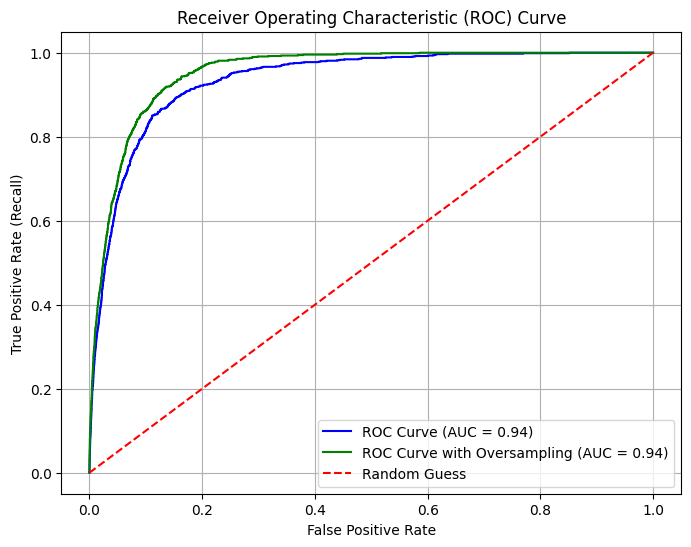

In [152]:
import matplotlib.pyplot as plt

# Step 3: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot(fpr_os, tpr_os, color='green', label=f"ROC Curve with Oversampling (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()

Looks like the ROC curve is better (further from the Random Guess line) for the model that used the oversampled data than the other one. 

- Youden's J statistic is a single statistic that captures the performance of a binary classifier. 
- It optimizes the trade-off between the true positive rate (recall = TP/(TP+FN)) and the false positive rate (FP/(FP+TN)).
- Yousen's J statistic find the point on the ROC curve that is the that is farthest from the diagonal (random guess) line. 

In [162]:
# Calculate Youden's J statistic
youdens_j = tpr - fpr
optimal_idx = np.argmax(youdens_j)
optimal_threshold = thresholds[optimal_idx]

# Calculate Youden's J statistic
youdens_j_os = tpr_os - fpr_os
optimal_idx_os = np.argmax(youdens_j_os)
optimal_threshold_os = thresholds[optimal_idx_os]

print(f"Optimal Threshold WITH oversampling: {optimal_threshold:.5f}")
print(f"Optimal Threshold WITHOUT oversampling: {optimal_threshold_os:.5f}")

Optimal Threshold WITH oversampling: 0.00990
Optimal Threshold WITHOUT oversampling: 0.01158


We can now check the performance of our models with these optimal thresholds.

In [154]:
from sklearn.metrics import confusion_matrix

# Step 4: Predict the test set with the optimal threshold
y_prob_logloss = pipeline_workflow.predict_proba(X_test)[:, 1]
y_pred_logloss_optimal = (y_prob_logloss > optimal_threshold).astype(int)

y_prob_oversampling = pipeline_workflow_oversampling.predict_proba(X_test)[:, 1]
y_pred_oversampling_optimal = (y_prob_oversampling > optimal_threshold_os).astype(int)

from sklearn.metrics import classification_report
report_logloss = classification_report(y_test, y_pred_logloss_optimal)
report_oversampling = classification_report(y_test, y_pred_oversampling_optimal)
print("Classification report of the pipeline_workflow_logloss:")
print("Confusion_matrix")
print(confusion_matrix(y_test, y_pred_logloss_optimal))
print("-------")
print("Report")
print(report_logloss)
print("--------------------------------------")
print("Classification report of the pipeline_workflow_oversampling:")
print("Confusion_matrix")
print(confusion_matrix(y_test, y_pred_oversampling_optimal))
print("-------")
print("Report")
print(report_oversampling)
print("--------------------------------------")    

Classification report of the pipeline_workflow_logloss:
Confusion_matrix
[[42100  7580]
 [   97   796]]
-------
Report
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     49680
           1       0.10      0.89      0.17       893

    accuracy                           0.85     50573
   macro avg       0.55      0.87      0.54     50573
weighted avg       0.98      0.85      0.90     50573

--------------------------------------
Classification report of the pipeline_workflow_oversampling:
Confusion_matrix
[[40283  9397]
 [   37   856]]
-------
Report
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     49680
           1       0.08      0.96      0.15       893

    accuracy                           0.81     50573
   macro avg       0.54      0.88      0.52     50573
weighted avg       0.98      0.81      0.88     50573

--------------------------------------


We can now see that the model with oversampling has a better performance than the model without oversampling. 
* The AUC score is higher, and the confusion matrix and the recall show that the model with oversampling has a better performance in predicting the positive class (it's raining!).
* The model with oversampling has an higher recall (0.96 vs 0.89) for the positive class although the precision is slighly lower (0.08 vs 0.10).
* Based on our original assumption and the use case (we don't want to miss a rain event), the model trained used the oversampling strategy provide a better classifier.

# 6 - Saving the model (with the pipeline)

In [160]:
import pickle as pkl
# Save the model and threshold
with open('xgb_model_with_threshold.pkl', 'wb') as f:
    pkl.dump({'model': pipeline_workflow_oversampling, 'threshold': optimal_threshold_os}, f)

The model is saved and can be used elsewhere, in a API for instance.

# 7 - Some more ...

Let's see how the threshold probability affects the precision, the recall and the F1-score.

In [155]:
from sklearn.metrics import precision_score, recall_score, f1_score

df_score = pd.DataFrame(columns=['threshold', 'recall', 'precision', 'f1_score'])
for i in range(1, 100, 1):
    threshold = i/100
    y_prob = pipeline_workflow.predict_proba(X_test)[:, 1]
    y_pred = (y_prob > threshold).astype(int)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    df_new = pd.DataFrame({'threshold': [threshold/100], 'recall': [recall], 'precision': [precision], 'f1_score': f1})
    df_score = pd.concat([df_score, df_new])
    
df_score_os = pd.DataFrame(columns=['threshold', 'recall', 'precision', 'f1_score'])
for i in range(1, 100, 1):
    threshold = i/100
    y_prob_oversampling = pipeline_workflow_oversampling.predict_proba(X_test)[:, 1]
    y_pred_oversampling = (y_prob_oversampling > threshold).astype(int)
    recall = recall_score(y_test, y_pred_oversampling)
    precision = precision_score(y_test, y_pred_oversampling)
    f1 = f1_score(y_test, y_pred_oversampling)
    df_new = pd.DataFrame({'threshold': [i/100], 'recall': [recall], 'precision': [precision], 'f1_score': f1})
    df_score_os = pd.concat([df_score_os, df_new])

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jerome/.py

<AxesSubplot:xlabel='threshold'>

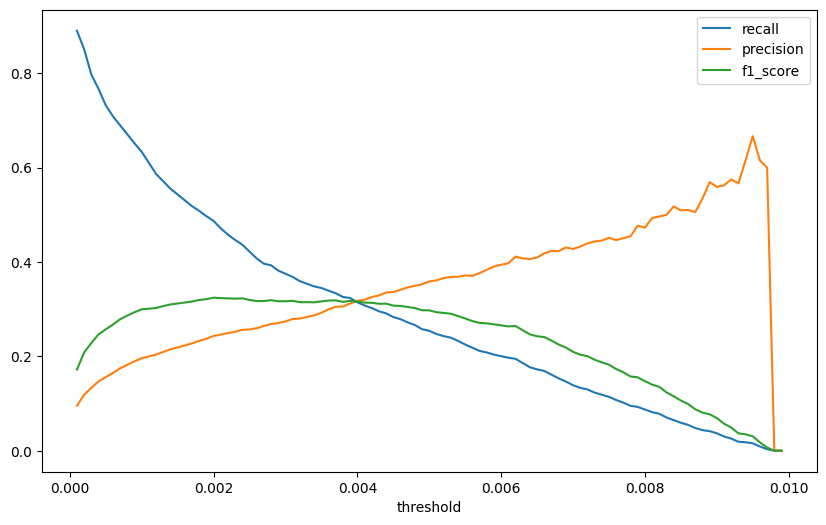

In [156]:
df_score.plot(x='threshold', y=['recall', 'precision', 'f1_score'], figsize=(10, 6))

<AxesSubplot:xlabel='threshold'>

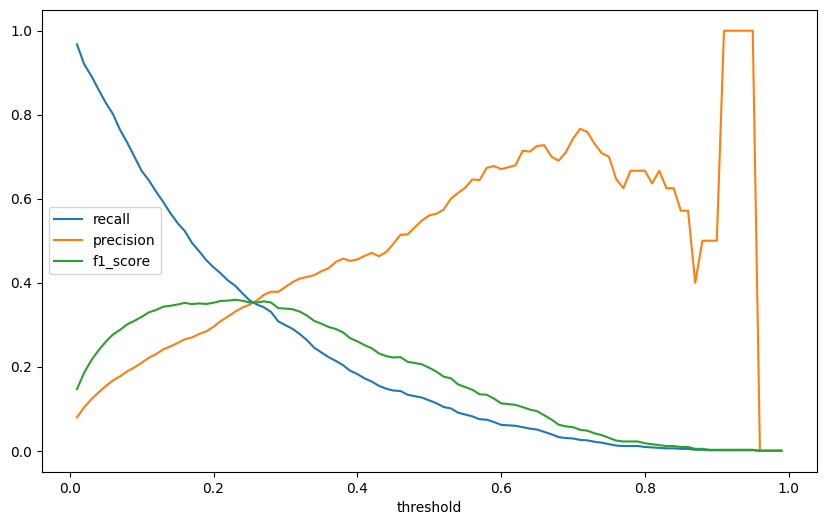

In [157]:
df_score_os.plot(x='threshold', y=['recall', 'precision', 'f1_score'], figsize=(10, 6))